In [1]:
import os
import numpy as np
import pandas as pd
os.chdir("C:\\Users\\HP\\Downloads")
df=pd.read_csv('spam.csv',encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
spam_df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [3]:
spam_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#converting the value of ham and spam into 1 or 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
spam_df['v1'] = encoder.fit_transform(spam_df['v1'])

In [7]:
#validation things worked so far
spam_df.head()
spam_df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
#check the duplicate values
spam_df.duplicated().sum()

403

In [9]:
#removing the duplicate value
spam_df = spam_df.drop_duplicates(keep = 'first')
spam_df.duplicated().sum()

0

In [10]:
spam_df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
spam_df['num_character'] = spam_df['v2'].apply(len)
!pip  install nltk
import nltk
nltk.download('punkt')
spam_df['num_words'] = spam_df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))
spam_df['num_sentence'] = spam_df['v2'].apply(lambda x : len(nltk.sent_tokenize(x)))
spam_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,v1,v2,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [12]:
#here we are going to convert the text data into suitable format
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import string

def transformTexts(text):
    text = text.lower()
    #tokenizing the text based on the words in the text
    text = nltk.word_tokenize(text)
    #including all those characters which are alphabet or number
    y = []
    for i in text:
        if i.isalnum:
            y.append(i)
            
    #storing the value of y into the vaiable text
    text = y[:]
    y.clear()
    #here we are going to convert the text data into suitable format
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import string

def transformTexts(text):
    text = text.lower()
    #tokenizing the text based on the words in the text
    text = nltk.word_tokenize(text)
    #including all those characters which are alphabet or number
    y = []
    for i in text:
        if i.isalnum:
            y.append(i)
            
    #storing the value of y into the vaiable text
    text = y[:]
    y.clear()
    #Removing the unnecessary words such as 'how are you ' or something which is not importent 
    #down here the stopwords.words('english') is nothing but all the lame set of words as described above
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    #the last step is nothing but steming in the steming we basically convert every verb form into the simple form such as
    #if we have dancing or danced we will convert them into dance and so on for this need to import something  hehehehe
    
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    text = y[:]
    y.clear()
    
    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
transformTexts('Hi Shehriar how are you? Did you eat my salad?And if you are dancing tell me I danced very well last time')

'hi shehriar eat salad danc tell danc well last time'

In [14]:
spam_df['transformed'] = spam_df['v2'].apply(transformTexts)

In [15]:
spam_df.head()

,v1,v2,num_character,num_words,num_sentence,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 544.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 819.2 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/300.2 kB 817.0 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 731.4 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/300.2 kB 850.6 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 805.3 kB/s eta 0:00:00


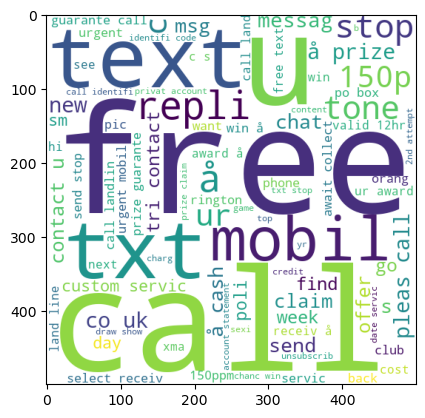

In [16]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')
spam_wc = wc.generate(spam_df[spam_df['v1'] == 1]['transformed'].str.cat(sep = " "))
plt.imshow(spam_wc)

In [18]:
spam_corpus = []
for msg in spam_df[spam_df['v1']==1]['transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
#same for the ham messages 
ham_corpus = []
for msg in spam_df[spam_df['v1']==0]['transformed'].tolist():
    for word in msg:
        ham_corpus.append(word)

In [19]:
spam_corpus_df = pd.DataFrame(spam_corpus)
spam_corpus_df.head()

,0
0,free
1,entri
2,2
3,wkli
4,comp


In [20]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

#seperating X and y
X = tfidf.fit_transform(spam_df['transformed']).toarray()
y = spam_df['v1']
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape

(4135, 3000)

In [22]:
# gb.fit(X_train,y_train)
# gb.score(X_test,y_test)
mb.fit(X_train, y_train)
mb.score(X_train, y_train)
# bb.fit(X_train,y_train)
# bb.score(X_test,y_test)

0.9833131801692866

In [23]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mb, open('model.pkl', 'wb'))